In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as optimize

## A) DIFFRACTION À L’INFINI PAR UNE FENTE DE LARGEUR b

La première experience relève à observer la figure de diffraction formé lorsqu'on éclaire une fente fine de largeur $b$ par une faisceau laser collimaté et monochromatique.

Après avoir placé le laser sur le banc optique, nous avons adjusté les positions de la fente ainsi que de l'écran pour qu'ils soit bien centré sur le faisceau laser.

On observe en variant la largeur de la fente que la figure de diffraction est comprimé (les maximas se rapprochent) lorsque la fente est élargi, et vis versa.

La distance fente-écran $D$ est particulièrement important dans cette expérience. En particulier, lorsque l'écran est trop près de la fente ($D \approx 10 \text{ cm}$), le nombre de Fresnel n'est plus petit devant l'unité. Pour se placer dans le régime de Fraunhofer, il faut donc s'assurer que l'écran soit plaçé suffisament loin derrière les fentes.

Les mesures décrites ci-dessous en été prises avec un laser rouge $\lambda_r = 650 \textrm{ nm}$, à une distance $D = 170 \pm 0.05 \textrm{ cm}$ de la fente. 

Dans le régime de Fraunhofer, la larguer du maxima central de la figure de diffraction $\Delta y$ est donné par la formule suivante :


$$\Delta y = 2 \frac{\lambda D}{b} $$
(Incert. de 0.05 cm car on pouvais measurer au mm près, donc on prend la moitié des graduations - les conditions était bonnes)


Donc selon la théorie, $2\lambda D = 2.21 \times 10^{-6} \textrm{ mm}^2$

In [41]:
coeff_theo = 2*650e-9 * 170e-2 # m^2
uncert_coeff_theo = 0.05e-2 * 2 * 650e-9 # m^2
print(f"{coeff_theo} ± {uncert_coeff_theo} m^2")


2.21e-06 ± 6.5e-10 m^2


   delta_y (cm)  uncert_d_y (cm) b (µm)  D (cm)
0          0.55              0.1    400     170
1          0.83              0.1    280     170
2          1.92              0.1    120     170
3          2.29              0.1    100     170
4          4.87              0.1     50     170
5          6.30              0.1     40     170
6          3.56              0.1      ?     170
fit error 4.122354938890153e-08  m^2


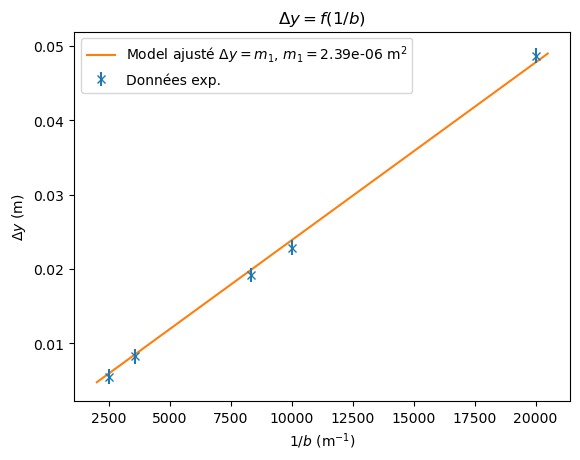

In [42]:
data_diff = pd.read_csv("data/diffraction_a.csv")

def propto_model(x, a):
    return a*x

print(data_diff)

delta_y = data_diff["delta_y (cm)"][:-2].to_numpy(dtype=float) * 1e-2 # m
b = data_diff["b (µm)"][:-2].to_numpy(dtype=float) * 1e-6 # m
b_inv = 1/b

#delta_y = sorted(delta_y)
#b_inv = sorted(b_inv)

uncert_delta_y = data_diff["uncert_d_y (cm)"][:-2].to_numpy(dtype=float) * 1e-2 # m


plt.errorbar(b_inv, delta_y, yerr=uncert_delta_y, fmt="x", label="Données exp.")
#plt.xlim((40, 450))
#plt.ylim(0, 5)

popt, pcov = optimize.curve_fit(propto_model, b_inv, delta_y, sigma=uncert_delta_y, absolute_sigma=True)
coeff_exp = popt[0]

perr = np.sqrt(np.diag(pcov)) # fit error

uncert_coeff_exp = perr[0]
print("fit error", uncert_coeff_exp, " m^2")

b_inv_linspace = np.linspace(2000, 20500, 100)
plt.plot(b_inv_linspace, propto_model(b_inv_linspace, coeff_exp), c="#ff7f0e", zorder=-1, label=f"Model ajusté $\Delta y=m_1 \frac{1}{b}$, $m_1=${coeff_exp:.3} m$^2$")
#plt.plot(b_inv, propto_model(b_inv, coeff_exp+uncert_coeff_exp), c="#ff7f0e", zorder=-1, label=f"Modèle fit $\Delta y=${coeff_exp:.3}$/b$")
#plt.plot(b_inv, propto_model(b_inv, coeff_exp-uncert_coeff_exp), c="#ff7f0e", zorder=-1, label=f"Modèle fit $\Delta y=${coeff_exp:.3}$/b$")
#coeff_max = ((delta_y[-1]+uncert_delta_y[-1]) - (delta_y[0]+uncert_delta_y[0]))/(b_inv[-1]-b_inv[0])
#plt.plot(b_inv, propto_model(b_inv, coeff_max), c="r", zorder=-1, label=f"Modèle fit $\Delta y=${coeff_exp:.3}$/b$")

plt.xlabel("$1/b$ (m$^{-1}$)")
plt.ylabel("$\Delta y$ (m)")
plt.legend()

plt.title("$\Delta y = f(1/b)$")



plt.savefig("figs/diff_1.png")
plt.show()



Un adjustement affine a été obtenu avec la librairie python curve_fit, le coefficient directeur ainsi trouvé de $(2.39 ± 0.04)\times 10^{-6} \textrm{ m}^2$ est en accord avec le résultat théorique attendu. 

L’incertitude de $m_1$, correspondant à un écart type, provient aussi de la fonction curve_fit.

In [43]:
delta_y_myst = (data_diff["delta_y (cm)"].to_numpy(dtype=float))[-1] * 1e-2 # m
b_myst = coeff_exp/delta_y_myst

# obtained by quadrature of each error component
uncert_b_myst = np.sqrt((uncert_coeff_exp/delta_y_myst)**2
                        + (coeff_exp/delta_y_myst**2)**2 * uncert_delta_y[-1]**2)

print(f"{b_myst*1e6:.3} ± {uncert_b_myst*1e6:.2} µm")

67.1 ± 2.2 µm


Sachant que pour la fente mystère $\Delta y = 3.56 ± 0.1 cm$, on obtient la largeur de la fente par interpolation linéaire :

$$ b_{mystère} = \frac{m}{\Delta y} = 67.1 ± 2 \textrm{ µm}$$

L'incertitude étant calculé en propageant les incertitudes du coefficient directeur $m_1$ et de $\Delta y$.

# B) Interférences à deux ondes - dispositif de Young

Cette seconde expérience

Figure d'interférence modulé par la figure de diffraction, donc aussi possible de déterminer la largeur de chaque fente $b$. Le setup experimental verifiant toujours les conditions du régime de Fraunhofer, on continue d'utiliser les mêmes equations que dans l'éxperience précendente.

$$i = \lambda \frac{D}{a}$$

$D = 180 \pm 0.05 \textrm{ cm}$

$\Delta a$ fait référence à l'incertitude de mesure de la variable $a$.
$$\Delta a = \sqrt{\left(\frac{\lambda}{i}\Delta D\right)^2 + \left(\frac{\lambda D}{i^2} \Delta i \right)^2}$$

In [44]:
data_young_1 = pd.read_csv("data/young_1.csv")
#print(data_young_1)

def print_data(x, delta_x, name=""):
    print("\n"+name)
    for i in range(len(x)):
        print(f"{i} | {x[i]:.3} ± {delta_x[i]:.2}")

D = 180e-2 # m
uncert_D = 0.05 # m
lamda_r = 650e-9 # m

dist = data_young_1["m_0-m_n (cm)"].to_numpy(dtype=float) * 1e-2 # m
no_fringes = data_young_1["n (no. of fringes)"].to_numpy(dtype=float)
uncert_dist = data_young_1["delta_(m_0-m_n) (cm)"].to_numpy(dtype=float) * 1e-2 # m

dwidth = data_young_1["delta_y (cm)"].to_numpy(dtype=float) * 1e-2 # m
uncert_dwidth = data_young_1["uncert_delta_y (cm)"].to_numpy(dtype=float) * 1e-2 # m

i = dist/no_fringes
uncert_i = uncert_dist/no_fringes


a = lamda_r*D/i
uncert_a = np.sqrt((lamda_r*uncert_D/i)**2 + 
                   (lamda_r*D/(i**2)*uncert_i**2)**2)

b = 2*lamda_r*D/dwidth
uncert_b = np.sqrt((2*lamda_r/dwidth * uncert_D)**2 +
                   (2*lamda_r*D/(dwidth**2) * uncert_dwidth)**2)

#print(i, uncert_i)

# RESULTS for YOUNG 1
print("Resultats Young 1")
print_data(i*1e3, uncert_i*1e3, "i (mm)")
print_data(a*1e6, uncert_a*1e6, "a (µm)")
print_data(b*1e6, uncert_a*1e6, "b (µm)")



Resultats Young 1

i (mm)
0 | 5.83 ± 0.25
1 | 3.75 ± 0.12
2 | 2.35 ± 0.077

a (µm)
0 | 2.01e+02 ± 5.6
1 | 3.12e+02 ± 8.7
2 | 4.99e+02 ± 1.4e+01

b (µm)
0 | 70.9 ± 5.6
1 | 67.8 ± 8.7
2 | 66.9 ± 1.4e+01


Pour la partie deux de Young, nous avons mesuré l'interfrange pour des distances $D$ differentes en utilisant la troisième bifente $a = 499\pm20 \textrm{ µm}$.

On trouve le coefficient directeur $m_2$ en faisant un adjustement affine sur $i=f(D)$

$$i = \lambda \frac{D}{a} = m_2 D$$

   D (cm)  delta_D (cm)  m_0-m_n (cm)  delta_(m_0-m_n) (cm)   n
0     180          0.05          2.74                   0.1  12
1     150          0.05          2.55                   0.1  12
2     135          0.05          2.10                   0.1  12
3      90          0.05          1.46                   0.1  12


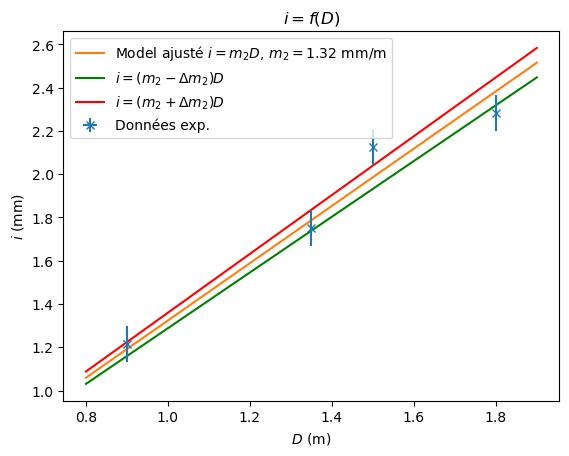

In [45]:
a_max = a[2] # m
uncert_a_max = uncert_a[2] # m


data_young_2 = pd.read_csv("data/young_2.csv")

print(data_young_2)

D_2 = data_young_2["D (cm)"].to_numpy(dtype=float) * 1e-2 # m
uncert_D_2 = data_young_2["delta_D (cm)"].to_numpy(dtype=float) * 1e-2 # m

dist_2 = data_young_2["m_0-m_n (cm)"].to_numpy(dtype=float) * 1e-2 # m
uncert_dist_2 = data_young_2["delta_(m_0-m_n) (cm)"].to_numpy(dtype=float) * 1e-2 # m

n_2 = data_young_2["n"].to_numpy(dtype=float) # no. of fringes

# as a function of D_2
i_2 = dist_2/n_2
uncert_i_2 = uncert_dist_2/n_2


plt.errorbar(D_2, i_2*1e3, xerr=uncert_D_2, yerr=uncert_i_2*1e3, fmt="x", label="Données exp.")

popt, pcov = optimize.curve_fit(propto_model, D_2, i_2, sigma=uncert_i_2)
perr = np.sqrt(np.diag(pcov)) # fit error

m_2 = popt[0] # no units m/m
uncert_m_2 = perr[0] # no units m/m

D_2_linspace = np.linspace(0.8, 1.9, 100)
plt.plot(D_2_linspace, propto_model(D_2_linspace, m_2*1e3), c="#ff7f0e", zorder=-1, label=f"Model ajusté $i=m_2 D$, $m_2=${m_2*1e3:.3} mm/m")
plt.plot(D_2_linspace, propto_model(D_2_linspace, (m_2-uncert_m_2)*1e3), c="g", zorder=-1, label="$i=(m_2-\Delta m_2) D$")
plt.plot(D_2_linspace, propto_model(D_2_linspace, (m_2+uncert_m_2)*1e3), c="r", zorder=-1, label="$i=(m_2+\Delta m_2) D$")

plt.ylabel("$i$ (mm)")
#plt.ylim(0, 2.5)
plt.xlabel("$D$ (m)")
plt.legend()
plt.title("$i = f(D)$")
plt.savefig("figs/young_2_i=f(D).png")

plt.show()








L'incertitude relative étant très petit pour $D$ (<0.07%, indiscernable sur le tracé), on décide de la négliger dans le calcul d'incertitude du coeff. directeur. Cela nous permet de continuer d'utiliser la fonction curve_fit, qui ne prend en compte que l'incertitude de la variable dépendente.

Comme d'après la théorie, on retrouve un relation linéaire entre $i$ et $D$. Où le coefficient directeur $m_2$ :
$$m_2 = \frac{\lambda}{a}$$

Connaissant déjà $a$ pour cette bi-fente, il nous est possible de vérifier la longeur d'onde du laser.


In [46]:
a_2 = lamda_r/m_2
uncert_a_2 = lamda_r/(m_2**2) * uncert_m_2

print(f"Valeur plus précise de a = {a_2*1e6:.3} ± {uncert_a_2*1e6:.2} µm")
print(f"Compared to a = {a_max*1e6:.3} ± {uncert_a_max*1e6:.2} µm")
print("Hmm, not confident with this one, I think I'll still with the old values")


lamda_r_exp = a_max * m_2
uncert_lamda_r_exp = np.sqrt((m_2*uncert_a_max)**2 + (a_max*uncert_m_2)**2)
print(f"Valeur experimental pour lambda rouge = {lamda_r_exp*1e9:.3} ± {uncert_lamda_r_exp*1e9:.2} nm")
print(f"Lambda donné par le fabricant {lamda_r*1e9} nm")
print("Dans les incertitudes, donc valeur experimental pour lamda concordant avec la valeur donné par le fabricant")

Valeur plus précise de a = 4.91e+02 ± 1.3e+01 µm
Compared to a = 4.99e+02 ± 1.4e+01 µm
Hmm, not confident with this one, I think I'll still with the old values
Valeur experimental pour lambda rouge = 6.6e+02 ± 2.6e+01 nm
Lambda donné par le fabricant 650.0 nm
Dans les incertitudes, donc valeur experimental pour lamda concordant avec la valeur donné par le fabricant


Des mesures d'interférences on été faites sur un laser vert et un laser rouge, avec l'écran positionné à $D = 180 \textrm{ cm}$ derrière la bi-fente.

Valeur experimental pour lambda rouge = 6.33e+02 ± 2.9e+01 nm
Lambda donné par le fabricant 650.0 nm

Valeur experimental pour lambda vert = 5.4e+02 ± 2.1e+01 nm
Lambda donné par le fabricant 535.0 nm

Valeur experimental pour lambda vert = 4.09e+02 ± 2.6e+01 nm
Lambda donné par le fabricant 405.0 nm

Lambda (nm) | i (mm)
6.33e+02 ± 2.9e+01 | 2.28 ± 0.083
5.4e+02 ± 2.1e+01 | 1.95 ± 0.053
4.09e+02 ± 2.6e+01 | 1.47 ± 0.083


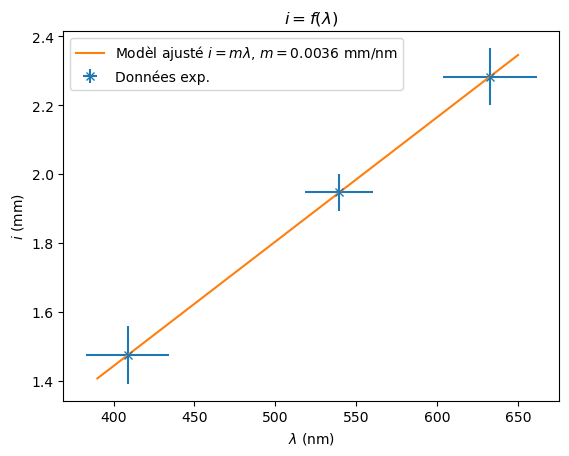

In [50]:
# D = 180 cm for both following measures
D_3 = D_2[0]
uncert_D_3 = uncert_D_2[0]

# for testing purposes
lamda_g = 535e-9 # m
lamda_b = 405e-9 # m


i_r = i_2[0]
uncert_i_r = uncert_i_2[0]
lamda_r_exp_2 = i_r*a_max/D_3
uncert_lamda_r_exp_2 = np.sqrt((a_max/D_3 * uncert_i_r)**2 + 
                             (i_r/D_3 * uncert_a_max)**2 + 
                             (i_r*a_max/D_3**2 * uncert_D_3)**2)
print(f"Valeur experimental pour lambda rouge = {lamda_r_exp_2*1e9:.3} ± {uncert_lamda_r_exp_2*1e9:.2} nm")
print(f"Lambda donné par le fabricant {lamda_r*1e9} nm")
#D_r = D_2[0]
#print(D_r)
print()

uncert_in = 0.1 * 1e-2 # m
in_g = 3.70 * 1e-2 # m, interfrange * n
n_g = 19

in_b = 1.77 * 1e-2
n_b = 12

i_g = in_g/n_g
uncert_i_g = uncert_in/n_g

i_b = in_b/n_b
uncert_i_b = uncert_in/n_b


lamda_g_exp = i_g*a_max/D_3
uncert_lamda_g_exp = np.sqrt((a_max/D_3 * uncert_i_g)**2 + 
                             (i_g/D_3 * uncert_a_max)**2 + 
                             (i_g*a_max/D_3**2 * uncert_D_3)**2)
print(f"Valeur experimental pour lambda vert = {lamda_g_exp*1e9:.3} ± {uncert_lamda_g_exp*1e9:.2} nm")
print(f"Lambda donné par le fabricant {lamda_g*1e9} nm")

print()

lamda_b_exp = i_b*a_max/D_3
uncert_lamda_b_exp = np.sqrt((a_max/D_3 * uncert_i_b)**2 + 
                             (i_b/D_3 * uncert_a_max)**2 + 
                             (i_b*a_max/D_3**2 * uncert_D_3)**2)
print(f"Valeur experimental pour lambda vert = {lamda_b_exp*1e9:.3} ± {uncert_lamda_b_exp*1e9:.2} nm")
print(f"Lambda donné par le fabricant {lamda_b*1e9} nm")


print()
print(f"Lambda (nm) | i (mm)")
print(f"{lamda_r_exp_2*1e9:.3} ± {uncert_lamda_r_exp_2*1e9:.2} | {i_r*1e3:.3} ± {uncert_i_r*1e3:.2}")
print(f"{lamda_g_exp*1e9:.3} ± {uncert_lamda_g_exp*1e9:.2} | {i_g*1e3:.3} ± {uncert_i_g*1e3:.2}")
print(f"{lamda_b_exp*1e9:.3} ± {uncert_lamda_b_exp*1e9:.2} | {i_b*1e3:.3} ± {uncert_i_b*1e3:.2}")


lamdas_exp = np.array([lamda_b_exp, lamda_g_exp, lamda_r_exp_2])
uncert_lamdas_exp = np.array([uncert_lamda_b_exp, uncert_lamda_g_exp, uncert_lamda_r_exp_2])
is_exp = np.array([i_b, i_g, i_r])
uncert_is_exp = np.array([uncert_i_b, uncert_i_g, uncert_i_r])

plt.errorbar(lamdas_exp*1e9, is_exp*1e3, xerr=uncert_lamdas_exp*1e9, yerr=uncert_is_exp*1e3, fmt="x", label="Données exp.")
popt, pcov = optimize.curve_fit(propto_model, lamdas_exp, is_exp)
m_3 = popt[0]
lamda_space = np.linspace(390*1e-9, 650*1e-9, 100)
plt.plot(lamda_space*1e9, propto_model(lamda_space, m_3)*1e3, label=f"Modèl ajusté $i = m\lambda$, $m = {m_3*1e-6:.2}$ mm/nm")
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("$i$ (mm)")
plt.title("$i = f(\lambda)$")


plt.legend()
plt.savefig("figs/i=f(lambda).png")
plt.show()

Relation linéaire croissante - correspond à la variation attendue pour $i=f(\lambda)$

Partie C

In [75]:
reseau_data = pd.read_csv("data/reseaux_1.csv")

print(reseau_data)

N_res = 100 # traits/mm
a_res = 1/N_res * 1e-3 # m
d_res = reseau_data["m_0-m_n (cm)"].to_numpy(dtype=float) * 1e-2 # m
uncert_d_res = reseau_data["delta_(m_0-m_n) (cm)"].to_numpy(dtype=float) * 1e-2 # m
n_res = reseau_data["n"].to_numpy(dtype=float)

i_res = d_res/n_res
uncert_i_res = uncert_d_res/n_res

print(i_res*1e3)
print(uncert_i_res*1e3)
#print(lamda_r)

D_res = 33.4 * 1e-2 # m
uncert_D_res = 1e-2 # m

a_res_exp = lamda_r * D_res/i_res[0]
uncert_a_res_exp = np.sqrt( (lamda_r/i_res[0] * uncert_D_res)**2 + (lamda_r*D_res/(i_res[0]**2) * uncert_i_res[0])**2)
print(f"a = {a_res_exp*1e6:.3} ± {uncert_a_res_exp*1e6:.3} µm")

N_res_exp = 1/(a_res_exp*1e3)  # traits/mm
uncert_N_res_exp = (uncert_a_res_exp*1e3)/(a_res_exp*1e3)**2 # traits/mm

print(f"N = {N_res_exp:.3} ± {uncert_N_res_exp:.3} traits/mm")

lambda_b_exp = a_res_exp*i_res[1]/D_res
uncert_lambda_b_exp = np.sqrt( (i_res[1]/D_res * uncert_a_res_exp)**2 + (a_res_exp/D_res * uncert_i_res[1])**2 + (a_res_exp*i_res[1]/(D_res**2) * uncert_D_res)**2 )

print(f"lambda_b = {lambda_b_exp*1e9:.3} ± {uncert_lambda_b_exp*1e9:.3} nm")


  couleur  m_0-m_n (cm)  delta_(m_0-m_n) (cm)   n  N (T/mm)
0   rouge         14.95                   0.2   6       100
1    bleu         16.70                   0.2  12       100
[24.91666667 13.91666667]
[0.33333333 0.16666667]
a = 8.71 ± 0.286 µm
N = 1.15e+02 ± 3.76 traits/mm
lambda_b = 3.63e+02 ± 16.7 nm


In [61]:
gonio_data = pd.read_csv("data/reseaux_2_gonio.csv")

# takes a string in 6°55' format
# returns the corresponding angle as float in radians
def deg_min2rad(s):
    d_start = 0
    d_end = 0
    m_start = 0
    m_end = 0
    for i in range(len(s)) :
        if s[i] == '°':
            d_end = i # not inclusive
            m_start = i+1
            continue
        elif s[i] == "'" :
            m_end = i # not inclusive
            break
    
    deg_str = s[d_start:d_end]
    min_str = s[m_start:m_end]

    deg = float(deg_str)
    min = float(min_str)

    angle_deg = deg + min/60

    return np.deg2rad(angle_deg)


print(deg_min2rad("6°30'"))

colours = gonio_data["couleur"]
alpha_p_raw = gonio_data["alpha_p (deg, min)"]
uncert_alpha_p_raw = gonio_data["delta_alpha_p (deg, min)"]
offset_raw = gonio_data["offset (deg, min)"][0]

alpha_p = np.array([deg_min2rad(alpha_p_raw[i]) for i in range(len(alpha_p_raw))])
uncert_alpha_p = np.array([deg_min2rad(uncert_alpha_p_raw[i]) for i in range(len(alpha_p_raw))])
offset = deg_min2rad(offset_raw)

i_p = alpha_p + offset*np.ones(len(alpha_p))
uncert_ip = uncert_alpha_p

N = 300 # traits par mm
a = 1/N * 1e-3 # m

lamda_gonio = a*np.sin(i_p) # m
uncert_lamda_gonio = a*np.cos(i_p)*uncert_ip # m

print(f"{uncert_ip[0]=}")
print()


#print(uncert_ip)
print(i_p)
print(a)
#print(lamda_gonio)
#print(uncert_lamda_gonio)

print("couleur | i_p (rad) | lambda (nm) | delat lambda (nm)")
for i in range(len(colours)):
    print(f"{colours[i]} | {i_p:.3} | {lamda_gonio:.3} | {uncert_lamda_gonio:.2}")


        


0.11344640137963143
uncert_ip[0]=0.0005817764173314432

[0.12217305 0.12304571 0.13293591 0.14660766 0.14980743 0.16493361
 0.17453293 0.17569648 0.18791378]
3.3333333333333337e-06
couleur | i_p (rad) | lambda (nm) | delat lambda (nm)


TypeError: unsupported format string passed to numpy.ndarray.__format__